In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd 
import numpy as np
from pandas import Series, DataFrame
from numpy import nan as NA
from datetime import datetime, date
from pandas.tseries.offsets import MonthEnd

<h2>Заргрузка исходных данных</h2>

In [3]:
report = pd.read_pickle('/Users/popov/Documents/Python/Pybursa/Web/report_pickle')
data = pd.read_pickle('/Users/popov/Documents/Python/Pybursa/Web/data_pickle')

In [4]:
offset = MonthEnd()
curr_month = report.index[-1]
prev_month, next_month = curr_month - offset, curr_month + offset

<h3>Отчётный месяц</h3>

In [5]:
'{:%B %Y}'.format(curr_month)

'July 2019'

<h2>Основная таблица</h2>

In [6]:
rep_2017 = report['2017':]
rep_2018 = report['2018':] # данные за 2018 год
rep_2019 = rep_2018.tail(13)
rep_2019

channels                           goals                       
             yandex google go.mail.ru bry cpc order basket contact measure
2018-07-31     2435   2513         69   1   0     7     51     184       7
2018-08-31     2637   2437         59   1   0     5    115     161       9
2018-09-30     2591   2343         85   4   0     2     84     134       9
2018-10-31     2746   2665         77   2   0     7     86     166      12
2018-11-30     2914   2444         61   3   0     5    162     182      24
2018-12-31     2948   2292         72   4   0     4    116     211      11
2019-01-31     3234   2440        122   4   0     8    113     166       9
2019-02-28     2925   2222        142   8   0     4     96     179      29
2019-03-31     2938   2223         86   2   0     9    149     190      28
2019-04-30     2994   2174         38   5   0     2     78     156      13
2019-05-31     2902   2059         22   1   0     6    117     143      16
2019-06-30     2989   1967         25   2   0    12     95     174      26
2019-07-31     2939   2232         35   7   0     9    134     147      23

<h3>Разница между отчетным и предшествующим месяцами</h3>

In [7]:
rep_diff = report.diff(periods=1) # разница от месяца к месяцу
rep_diff[curr_month:].astype(int) # разница между предыдущим и отчетным месяцами

channels                           goals                       
             yandex google go.mail.ru bry cpc order basket contact measure
2019-07-31      -50    265         10   5   0    -3     39     -27      -3

<h2>Графики</h2>
<h3>Столбчатая диаграмма соотношения каналов трафика</h3>

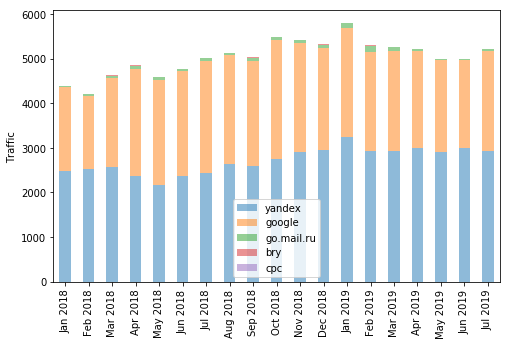

In [8]:
from matplotlib.dates import WeekdayLocator, MonthLocator, DateFormatter
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1, 1, 1)
rep_2018.channels.plot(ax=ax, kind='bar', stacked=True, alpha=0.5);
ax.set_ylabel('Traffic');
ax.legend(loc='lower center');

#fig.autofmt_xdate()
ticks = ax.set_xticklabels(['{:%b %Y}'.format(x) for x in rep_2018.index]);

#ax.plot_date (rep_2018.channels.index.to_pydatetime(), rep_2018.channels)
#weekday_locator = WeekdayLocator(byweekday=(0), interval=1)
#ax.xaxis.set_minor_locator(MonthLocator())
#ax.xaxis.set_minor_formatter(DateFormatter("%b"))
#ax.xaxis.set_major_locator(MonthLocator())
#ax.xaxis.set_major_formatter(DateFormatter("\n\n%Y"))

<h3>Линейная диаграмма изменений трафика</h3>

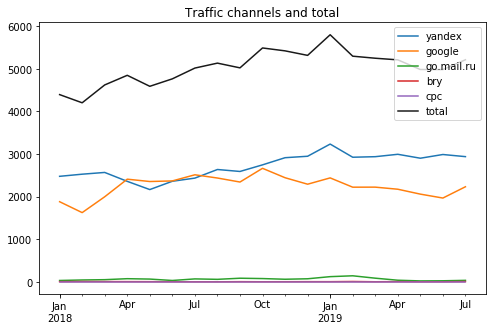

In [9]:
fig = plt.figure(figsize=(8,5));
ax = fig.add_subplot(111);
rep_2018.channels.plot(ax=ax);
rep_2018.channels.sum(axis=1).plot(color=(0,0,0), linewidth=1.5, alpha=.9, label='total');
ax.set_title('Traffic channels and total')
ax.legend(loc='upper right');

<h2>Табличные данные</h2>
<h3>Ключевые слова и количество визитов</h3>

In [10]:
kw = 'keyword visit'.split()

In [11]:
data.visit = data.visit.astype(int)
data[kw]

keyword  visit
bing       0                                    двери ясень жемчуг      3
           1                                                amazon      1
go.mail.ru 0                                             (not set)     34
           1             купить недорогое дверное полотно в москве      1
google     0                                         дешевые двери    208
           1                                          двери дешево    191
           2                          недорогие межкомнатные двери    178
           3                                       двери из дерева    140
           4                             np - /?cnt=catalog&r=2438     99
           5                                      np - /?pid=pokaz     64
           6                             np - /?cnt=catalog&r=1428     54
           7                                                np - /     39
           8                                дверные полотна купить     23
           9                                       дверные полотна     20
           10                                      полотна дверные     12
           11                                        двери продажа     11
           12                                      недорогие двери     11
           13                                       двери в ванную      8
           14                                      дверное полотно      8
           15                               дверное полотно купить      7
           16                                 np - /?pid=pricelist      6
           17                                 дверное полотно цена      6
           18                 купить межкомнатные двери с коробкой      6
           19                                     двери с коробкой      5
           20                            np - /?cnt=catalog&r=3124      4
           21                             np - /?cnt=catalog&r=916      4
           22                                   np - /?pid=contact      4
           23                               дверное полотно дешево      4
           24                                  дверное полотно мдф      4
           25                                        полотно двери      4
...                                                            ...    ...
yandex     2166               александрийские двери купить каталог      1
           2167             александрийские двери официальный сайт      1
           2168  александрийские двери официальный сайт каталог...      1
           2169  александрийские двери официальный сайт каталог...      1
           2170  александрийские двери официальный сайт каталог...      1
           2171  александрийские двери официальный сайт каталог...      1
           2172  александрийские двери официальный сайт каталог...      1
           2173      александрийские двери официальный сайт москва      1
           2174         александровские двери каролина эмаль белая      1
           2175  александровские двери межкомнатные официальный...      1
           2176  александровские двери межкомнатные официальный...      1
           2177             александровские двери официальный сайт      1
           2178                   алексдорс двери официальный сайт      1
           2179  алис я хочу двери сами посмотреть покажи мне м...      1
           2180  алиса, покажи мне двери на кухню, 70 дециметро...      1
           2181  алиса, установка простых дверей, зал, туалет, ...      1
           2182                          алкидная эмаль для дверей      1
           2183  алкидную эмаль для дверей сильно разбавить рас...      1
           2184                    аллеанза двери официальный сайт      1
           2185                     аллегро двери официальный сайт      1
           2186  алтайские двери новосибирск алтайские двери са...      1
           2187                   алтайские двери официальный сайт      1
           2188                             алтекс дверные поло

<h3>Самые популярные ключевые слова по каждой поисковой системе</h3>

In [12]:
data.groupby(level=0, axis=0)[kw].apply(lambda x: x.xs(x.visit.idxmax())) #.xs(0, level=1)

,keyword,visit
bing,двери ясень жемчуг,3
go.mail.ru,(not set),34
google,дешевые двери,208
rambler,купить двери,1
yahoo,np - /?cnt=catalog&r=2438,2
yandex,дверь гармошка,122


<h3>Топ-5 запросов по каждой поисковой системе</h3>

In [13]:
data_grupped = data.sort_values('visit', ascending=False).groupby(level=0, axis=0) # группировка по поисковой системе
data_top5 = data_grupped[['keyword', 'visit']].apply(lambda x: x.iloc[:5]) # топ-5 каждой ПС
data_top5.reset_index(level=0).drop('level_0', axis=1)

keyword  visit
bing       0                         двери ясень жемчуг      3
           1                                     amazon      1
go.mail.ru 0                                  (not set)     34
           1  купить недорогое дверное полотно в москве      1
google     0                              дешевые двери    208
           1                               двери дешево    191
           2               недорогие межкомнатные двери    178
           3                            двери из дерева    140
           4                  np - /?cnt=catalog&r=2438     99
rambler    0                               купить двери      1
yahoo      0                  np - /?cnt=catalog&r=2438      2
yandex     3                             дверь гармошка    122
           4                             двери гармошка     76
           0                                  (not set)     39
           5      двери гармошка в леруа мерлен каталог     26
           6                      дверь гармошка купить     26